# Evolutionary H-Clustering


## Imports & Common Functions

In [1]:
!pip install deap
import time, array, random, copy, math, sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from deap import algorithms, base, benchmarks, tools, creator
from deap.benchmarks.tools import hypervolume
import seaborn
import random
from tqdm.notebook import tqdm
from sklearn import datasets
import math
def uniform(low, n, k):
  sol = np.random.randint(0,high = k, size = n).tolist()
  return sol[0]
def mutation(ind, k):
  index = np.random.randint(0,high = len(ind))
  ind[index] = np.random.randint(0,high = k)
  return ind,
def fitness_var(ind, k, data):
  ind_np = np.array(ind)
  sum_var = 0
  for i in range(k):
    temp = data[ind_np == i,:]
    size = temp.shape[0]
    if size != 0:
      vars = np.sum(np.var(temp, axis = 1))
      sum_var = sum_var + (vars / size)
  return sum_var,
def fitness_dist(ind, k, data):
  ind_np = np.array(ind)
  sum_dist = 0
  for i in range(k):
    temp = data[ind_np == i,:]
    size = temp.shape[0]
    if size != 0:
      centroid = np.mean(temp, axis = 0)
      dist = (temp[:,0] - centroid[0])**2 + (temp[:,1] - centroid[1])**2 + (temp[:,2] - centroid[2])**2 + (temp[:,3] - centroid[3])**2
      sum_dist = sum_dist + (np.sum(np.sqrt(dist)) / size)
  return sum_dist,

## Maximize Variance 

In [2]:
iris = datasets.load_iris().data
n = iris.shape[0]
k = 30
pop_size = 50

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_float", uniform, 0, n, k)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    return sum(individual),


toolbox.register("evaluate", lambda x: fitness_var(x, k, iris))

toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate",  lambda x: mutation(x, k))

toolbox.register("select", tools.selTournament, tournsize=3)

pop = toolbox.population(n=pop_size)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaMuPlusLambda(pop, toolbox, 
                                     mu=pop_size,
                                     lambda_ = pop_size,
                                     cxpb=0.5, mutpb=0.5, ngen= 2000,
                                     stats=stats, halloffame=hof, verbose=False)


Variance:  133.43387751436782
Distance:  3.0727667305367667


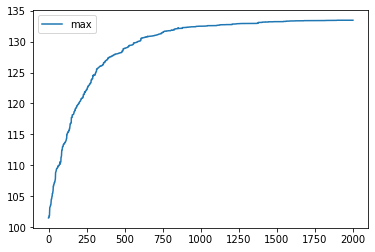

In [3]:
var_max = hof[0]
results = pd.DataFrame(log)
print("Variance: ", fitness_var(var_max, k, iris)[0])
print("Distance: ", fitness_dist(var_max, k, iris)[0])
plt.plot(results['max'], label  = 'max')
plt.legend()

## Maximize Distance to Centroid

In [4]:
iris = datasets.load_iris().data
n = iris.shape[0]
k = 30
pop_size = 50

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_float", uniform, 0, n, k)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    return sum(individual),


toolbox.register("evaluate", lambda x: fitness_dist(x, k, iris))

toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate",  lambda x: mutation(x, k))

toolbox.register("select", tools.selTournament, tournsize=3)

pop = toolbox.population(n=pop_size)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaMuPlusLambda(pop, toolbox, 
                                     mu=pop_size,
                                     lambda_ = pop_size,
                                     cxpb=0.5, mutpb=0.5, ngen= 2000,
                                     stats=stats, halloffame=hof, verbose=False)


/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Variance:  108.49037109375
Distance:  75.98327407987323


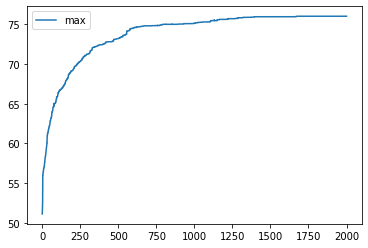

In [5]:
dist_max = hof[0]
results = pd.DataFrame(log)
print("Variance: ", fitness_var(dist_max, k, iris)[0])
print("Distance: ", fitness_dist(dist_max, k, iris)[0])
plt.plot(results['max'], label  = 'max')
plt.legend()

## Comparison 

In [6]:
unique, counts = np.unique(np.array(var_max), return_counts=True)
print("Var_max")
print(np.asarray((unique, counts)))
unique, counts = np.unique(np.array(dist_max), return_counts=True)
print("Var_max")
print(np.asarray((unique, counts)))

Var_max
[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  20  21  22  23  24  25  26  27  28  29]
 [  1   1   1   1   1   1   1   1   1   1   1 116   1   1   1   1   1   1
    1   1   1   1   6   1   1   1   1   1   1   1]]
Var_max
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 2  4  4  4  4  4  4  2  2  2  2  2  2  2  4  4  4  2  2  6  4  4  2  2
   4  2  2 64  2  2]]


## Evolutionary Normal Clustering
Minimize distance from centroid

In [7]:
iris = datasets.load_iris().data
n = iris.shape[0]
k = 30
pop_size = 50

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_float", uniform, 0, n, k)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    return sum(individual),


toolbox.register("evaluate", lambda x: fitness_dist(x, k, iris))

toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate",  lambda x: mutation(x, k))

toolbox.register("select", tools.selTournament, tournsize=3)

pop = toolbox.population(n=pop_size)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaMuPlusLambda(pop, toolbox, 
                                     mu=pop_size,
                                     lambda_ = pop_size,
                                     cxpb=0.5, mutpb=0.5, ngen= 2000,
                                     stats=stats, halloffame=hof, verbose=False)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Variance:  105.8687473003826
Distance:  1.677561811495202


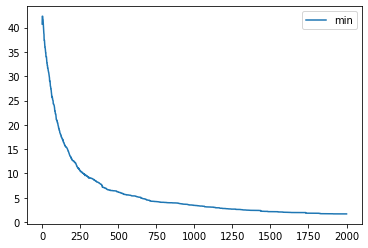

In [8]:
dist_min = hof[0]
results = pd.DataFrame(log)
print("Variance: ", fitness_var(dist_min, k, iris)[0])
print("Distance: ", fitness_dist(dist_min, k, iris)[0])
plt.plot(results['min'], label  = 'min')
plt.legend()

In [9]:
unique, counts = np.unique(np.array(dist_min), return_counts=True)
print("Var_max")
print(np.asarray((unique, counts)))

Var_max
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 1  1  1  1  1  1  3  1  1 11 73  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1 37  1  1  1]]
